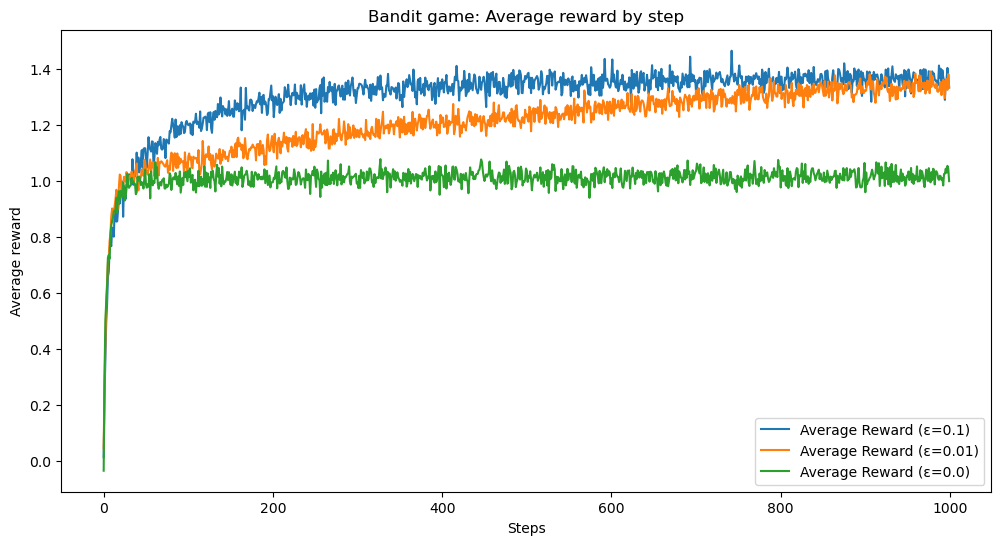

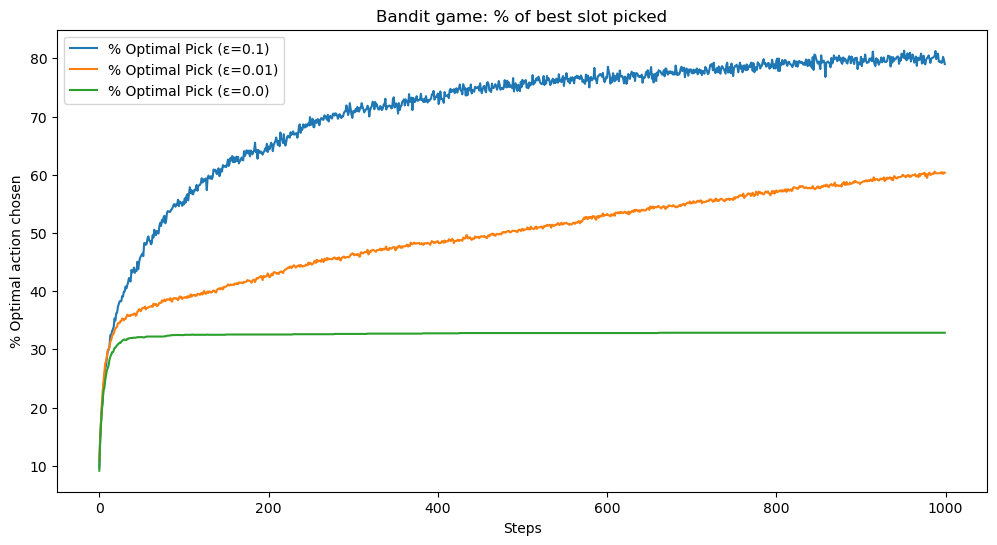

In [ ]:
# Niveen Abdul-Mohsen (bvn9ad)
# Reinforcement Learning (CS 4771) - Multi-armed Bandit Problem
# This code simulates a multi-armed bandit problem using an epsilon-greedy strategy
# and visualizes the results.
# I used numpy for numerical operations and matplotlib for plotting.



import numpy as np
import matplotlib.pyplot as plt

# This function simulates trying different slot machines (bandit arms).
def simulate_bandit(slots, epsilon, rounds, games):
    # Track total rewards and how often we picked the actual best slot
    all_rewards = np.zeros((games, rounds))
    all_best_pick = np.zeros((games, rounds))
    for game in range(games):
        # Assign a hidden payout value to each slot machine
        true_values = np.random.normal(0, 1, slots)
        best_slot = np.argmax(true_values)
        Q = np.zeros(slots)       # Estimates of average payout for each slot
        counts = np.zeros(slots)  # How many times we've played each slot
        for step in range(rounds):
            # Decide: try a random slot (explore) or pick the slot that seems best (exploit)
            if np.random.rand() < epsilon:
                choice = np.random.choice(slots)
            else:
                choice = np.argmax(Q)
            # Get a reward and update our records
            reward = np.random.normal(true_values[choice], 1)
            all_rewards[game, step] = reward
            all_best_pick[game, step] = int(choice == best_slot)
            counts[choice] += 1
            # Update our guess for how good the chosen slot is
            Q[choice] += (reward - Q[choice]) / counts[choice]
    return all_rewards, all_best_pick

# This function draws the graphs: average reward, and % of times the best slot was chosen
def show_results(results, labels):
    plt.figure(figsize=(12,6))
    for rewards, _, label in results:
        plt.plot(np.mean(rewards, axis=0), label=f"Average Reward ({label})")
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    plt.legend()
    plt.title("Bandit game: Average reward by step")
    plt.show()
    
    plt.figure(figsize=(12,6))
    for _, bests, label in results:
        plt.plot(np.mean(bests, axis=0)*100, label=f"% Optimal Pick ({label})")
    plt.xlabel("Steps")
    plt.ylabel("% Optimal action chosen")
    plt.legend()
    plt.title("Bandit game: % of best slot picked")
    plt.show()

# Set up and run the experiment for different "exploration rates" (epsilon)
epsilons = [0.1, 0.01, 0.0]
results = []
for eps in epsilons:
    rewards, bests = simulate_bandit(slots=10, epsilon=eps, rounds=1000, games=2000)
    results.append((rewards, bests, f"ε={eps}"))

show_results(results, [f"ε={e}" for e in epsilons])